# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [24]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [25]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [26]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
# read the data
df = pd.read_csv("foodhub_order.csv")

In [28]:
# view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [29]:
df.shape

(1898, 9)

#### Observations: The dataset returns 1898 rows and 9 columns. The following dataframe for this Food Hub project produces 9 columns and each row corresponds to the order placed by a customer that gives us a deep look into the type of cuisine, day of the week, rating, food preperation time and delivery time. This will be very useful data to understand the wants and needs of the consumers ordering through Food Hub.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [33]:
# Use info()to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The different datatypes of the different columns in the dataset are one float64, four int64, and 4 object datatypes. In this dataset there are 5 numerical columns and 4 object columns. Looking into the DataFrame all 9 columns have 1898 in the Non-null Count which states we don't have any missing values in it.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [39]:
# Check for missing values in the DataFrame
print(df.isnull().sum())


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: Looking at the output generated from the DataFrame there are no missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [45]:
# Check the summary statistics of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations: The minimum amount of time it takes for food to be prepared once an order is placed is 20 minutes. The maximum amount of time it takes for food to be prepared once an order is placed is 35 minutes and the average amount of time it takes for food to be prepared once an order is placed is 27.37 minutes.


In [222]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
Total_del_time,1898.0,5.153372e+01,6.833603,35.00,47.00,52.00,5.600000e+01,68.00
Total_d_time,1898.0,5.153372e+01,6.833603,35.00,47.00,52.00,5.600000e+01,68.00


### **Question 5:** How many orders are not rated? [1 mark]

In [52]:
# Number of orders not rated
df['rating'].value_counts()


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [53]:
df['rating'].value_counts()['Not given']

736

#### Observations: There are 736 orders that are not given a rating.


In [ ]:
df.rating.value_counts()

In [222]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
Total_del_time,1898.0,5.153372e+01,6.833603,35.00,47.00,52.00,5.600000e+01,68.00
Total_d_time,1898.0,5.153372e+01,6.833603,35.00,47.00,52.00,5.600000e+01,68.00


In [223]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [224]:
df[df.rating=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_del_time,Total_d_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,48
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,49,49
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,62,62
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30,53,53
...,...,...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30,56,56
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28,50,50
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21,50,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55,55


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Cost of Order 

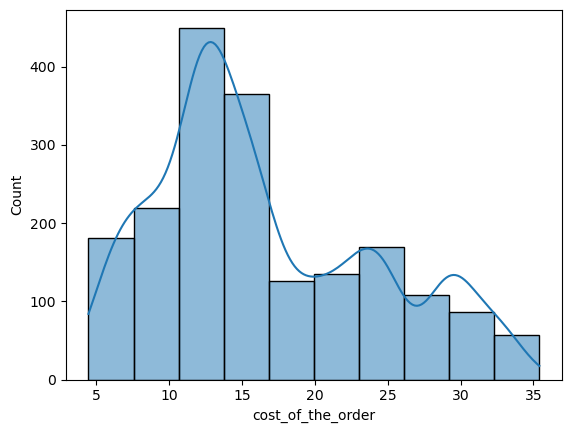

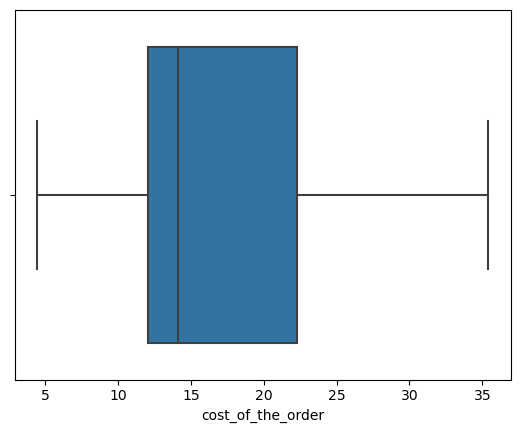

In [102]:
#cost of order
sns.histplot(data = df, x= 'cost_of_the_order', bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();


<Axes: xlabel='cost_of_the_order', ylabel='Count'>

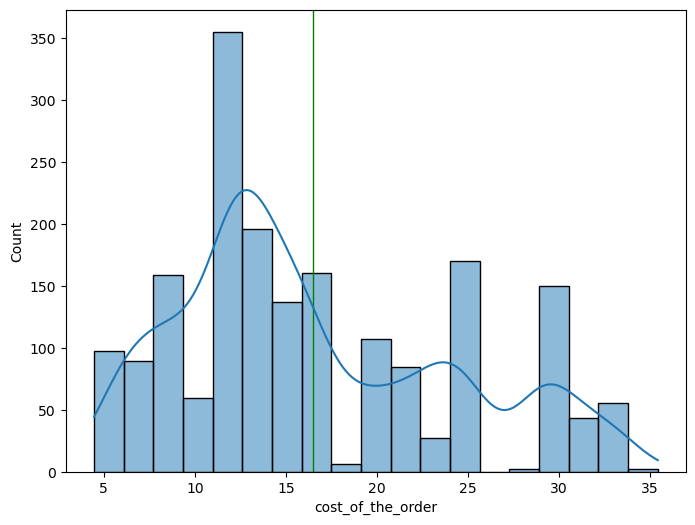

In [114]:
plt.figure(figsize = (8,6))
plt.axvline(df['cost_of_the_order'].mean(), color='g', linewidth=1)
sns.histplot(data = df, x = 'cost_of_the_order', kde = True)

### Observations

While analyzing the histogram it looks to be skewed to the left which would indicate Foodhub receives more orders that are less expensive. The boxplot shows that orders are right-skewed. The median cost is around 14 dollars and the average FoodHub order cost is about 16 dollars. 


### Restaurant Name 

<Axes: xlabel='restaurant_name', ylabel='count'>

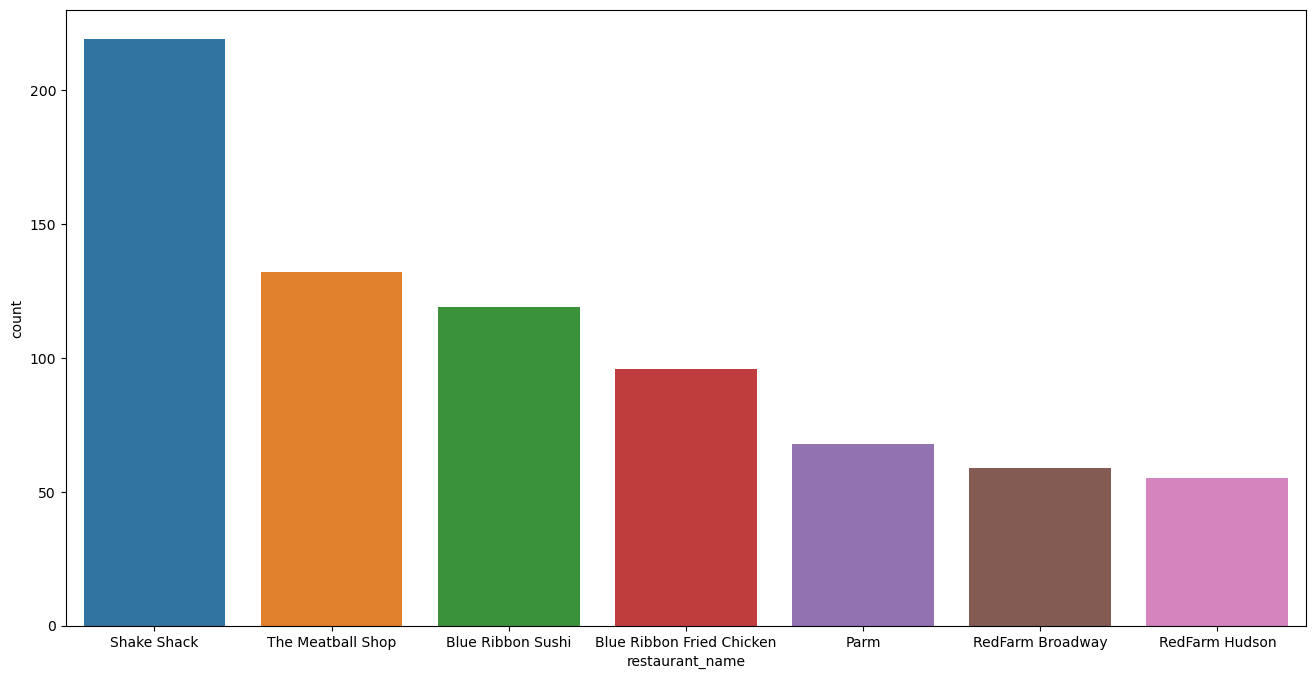

In [92]:
plt.subplots(figsize = (16,8))
sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:7].index)

### Observations: 

The restaurant with the most orders placed was Shake Shack. Followed by:

2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm
6. RedFarm Broadway
7. RedFarm Hudson

### Customer ID

In [206]:
plt.figure(figsize = (200,50))
sns.countplot(data = df, x = 'customer_id')

<Axes: xlabel='customer_id', ylabel='count'>

In [70]:
df['customer_id'].nunique()

1200

In [71]:
df['customer_id'].value_counts().unique()

array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

#### Observations: 

There are a total of 1200 unique FoodHub customers with and order count that ranges between 1-13.


### Cuisine Type

<Axes: xlabel='cuisine_type', ylabel='count'>

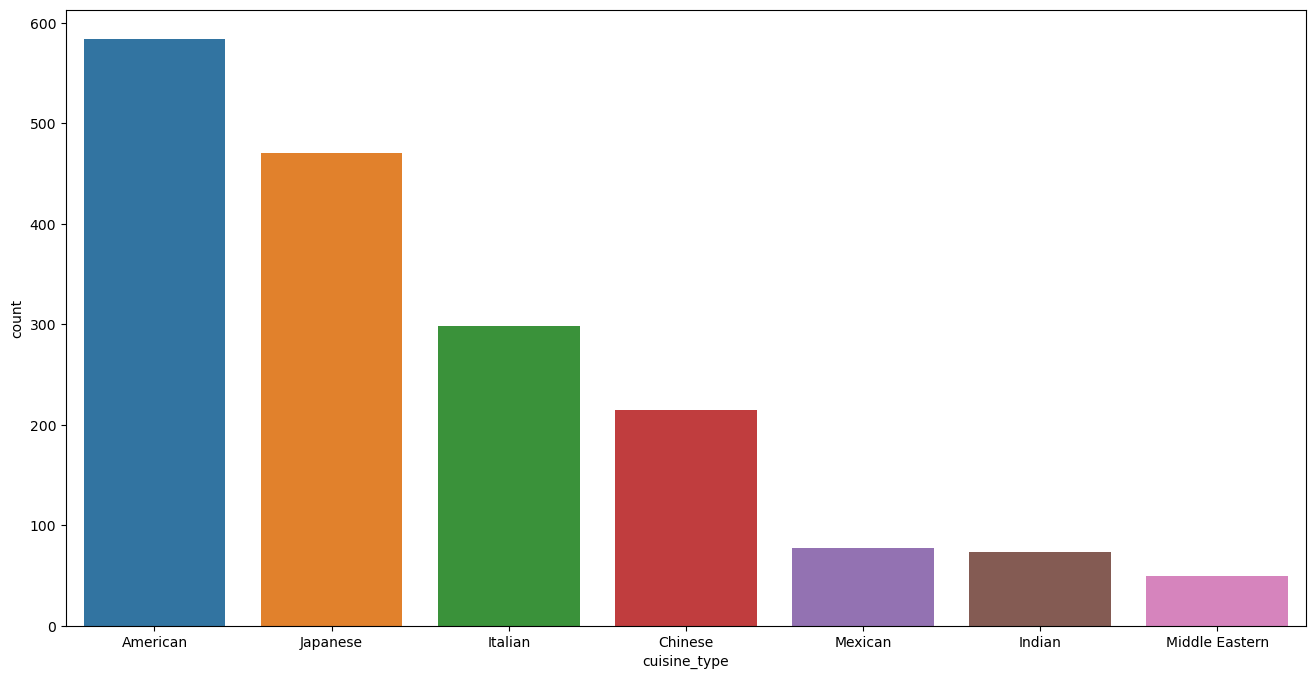

In [113]:
plt.subplots(figsize = (16,8))
sns.countplot(data = df, x = 'cuisine_type', order = df.cuisine_type.value_counts().iloc[:7].index)

### Observations: 

The most ordered cuisine is American with more than 500 orders placed. The next most popular types of cuisine are as followed:

2. Japenese
3. Italian
4. Chinese
5. Mexican
6. Indian
7. Middle Eastern

<Axes: xlabel='rating', ylabel='count'>

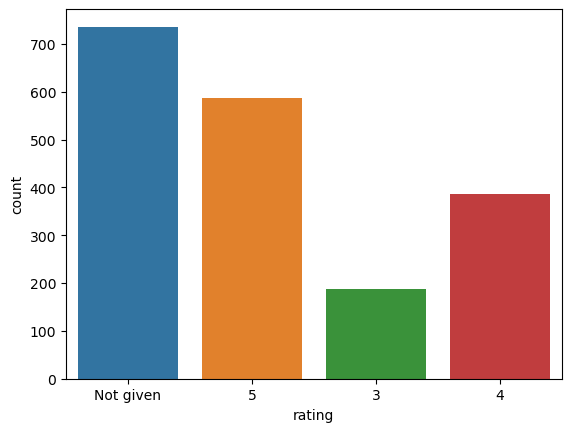

In [217]:
sns.countplot(data = df, x = 'rating')

### Observations: 

When analyzing the rating criteria most FoodHub oreders placed provided no rating. Looking at the ratings, 5 is the most popular score followed by 4.

<Axes: xlabel='day_of_the_week', ylabel='count'>

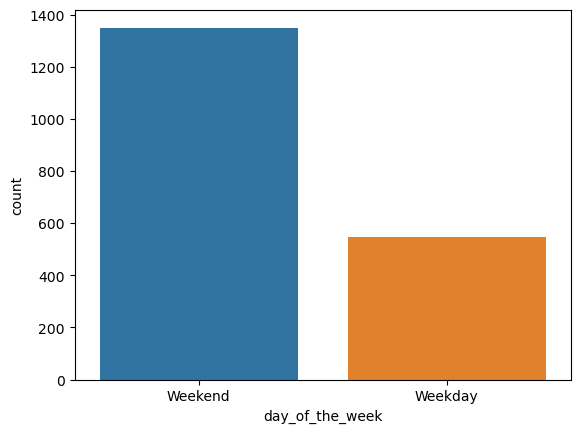

In [215]:
sns.countplot(data = df, x = 'day_of_the_week')

In [216]:
df['day_of_the_week'].value_counts().reset_index()

,index,day_of_the_week
0,Weekend,1351
1,Weekday,547


### Observations: 

The majority of FoodHub orders are placed on the weekend.

1. Weekend - 71% of all orders
2. Weekday - 29% of all orders

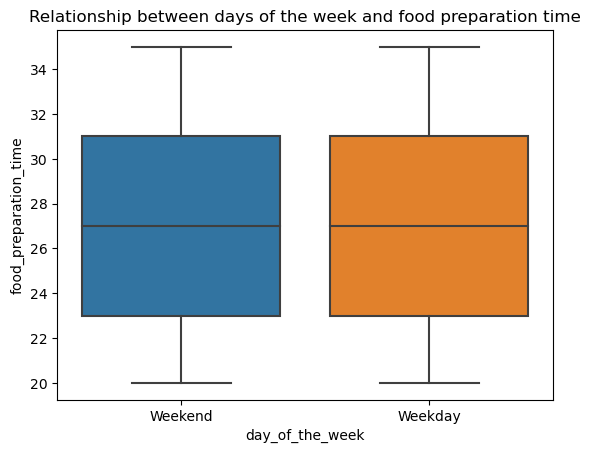

In [221]:
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')\
.set(title='Relationship between days of the week and food preparation time')
plt.show();

### Observations: 

There is no difference between the distribution of the food preparation time variable from weekends versus weekdays.

In [225]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'Total_del_time',
       'Total_d_time'],
      dtype='object')

In [226]:
df.order_id.nunique()

1898

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [123]:
df['restaurant_name'].value_counts().sort_values(ascending=False).head(5).reset_index()

,index,restaurant_name
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations: The top 5 restaurants in terms of orders received are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm 

These 5 restaurants received the most number of orders via FoodHub.


In [227]:
df['restaurant_name'].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [135]:
df.groupby('day_of_the_week')['cuisine_type'].value_counts(ascending = False)


day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

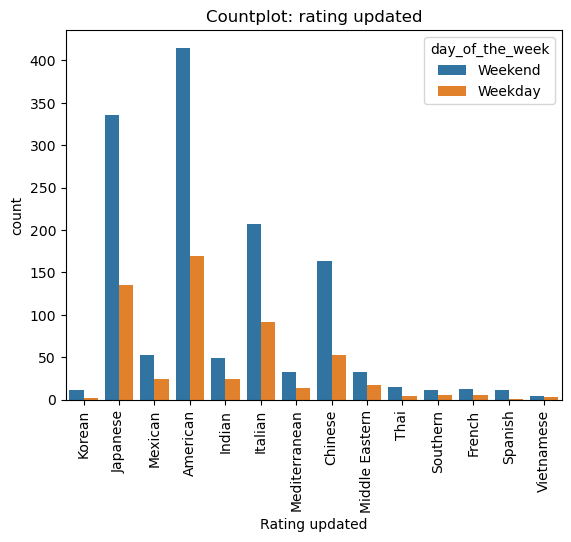

In [136]:
sns.countplot(data= df, x= 'cuisine_type', hue='day_of_the_week').set(title='Countplot: rating updated', xlabel = 'Rating updated');
plt.xticks(rotation=90);
plt.show();

In [229]:
df[df.day_of_the_week == 'Weekend']['cuisine_type'].value_counts().reset_index()

,index,cuisine_type
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53
5,Indian,49
6,Mediterranean,32
7,Middle Eastern,32
8,Thai,15
9,French,13


In [232]:
data.groupby(['cuisine_type'])['day_of_the_week'].value_counts()

cuisine_type    day_of_the_week
American        Weekend            415
                Weekday            169
Chinese         Weekend            163
                Weekday             52
French          Weekend             13
                Weekday              5
Indian          Weekend             49
                Weekday             24
Italian         Weekend            207
                Weekday             91
Japanese        Weekend            335
                Weekday            135
Korean          Weekend             11
                Weekday              2
Mediterranean   Weekend             32
                Weekday             14
Mexican         Weekend             53
                Weekday             24
Middle Eastern  Weekend             32
                Weekday             17
Southern        Weekend             11
                Weekday              6
Spanish         Weekend             11
                Weekday              1
Thai            Weekend         

#### Observations: American cuisine is the most popular cuisine on the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [138]:
col = df['cost_of_the_order']
sum = 0
for i in col:
    if(i>20):
        sum = sum +1
print('The total number of orders with a cost over 20 dollars:', sum)
print('Percentage of such orders in the dataset:', "{:.1f}".format(sum/len(df['cost_of_the_order'])*100))

The total number of orders with a cost over 20 dollars: 555
Percentage of such orders in the dataset: 29.2


In [233]:
df[df.cost_of_the_order > 20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_del_time,Total_d_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,45
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,40
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44,44
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,40,40
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,43,43
...,...,...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24,55,55
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,56,56
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21,50,50
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48,48


In [234]:
df_greater_than_20 = df[df.cost_of_the_order > 20]
df_greater_than_20.shape

(555, 11)

#### Observations:
The percentage of the orders that cost more than 20 dollars is 29.24%.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [139]:
## Mean order delivery time
round(df.delivery_time.mean(),2)

24.16

#### Observations: The mean order delivery time is 24.16 dollars.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [140]:
df[df.cost_of_the_order == df.cost_of_the_order.max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations: 

Customer ID: 62359 spent the most amount on a single order of 35.41 dollars and will be given a free 15 dollar coupon. This was a weekday order and the customer ordered from Pylos restaurant which is categorized as s Mediterranean restaurant.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

https://seaborn.pydata.org/examples/index.html



/var/folders/2_/x15xttjn0yv8wqsz7g37x85r0000gn/T/ipykernel_91810/1204564924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


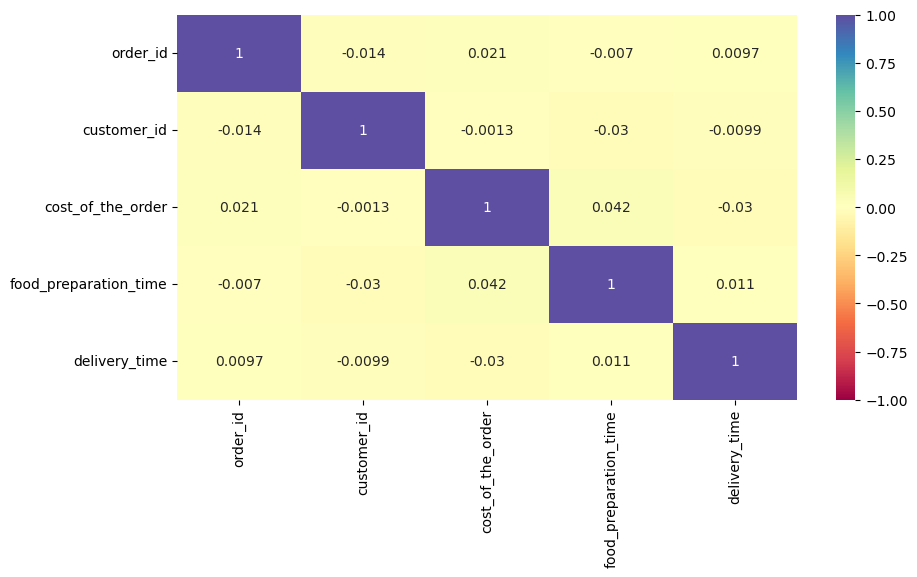

In [166]:
#Bivariate Analysis
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations: There is not a strong correlation among the variables and the food preparation time has a positive correlation with the cost of the order. The delivery time has a negative correlation with the food preparation time.

<Axes: xlabel='cuisine_type', ylabel='cost_of_the_order'>

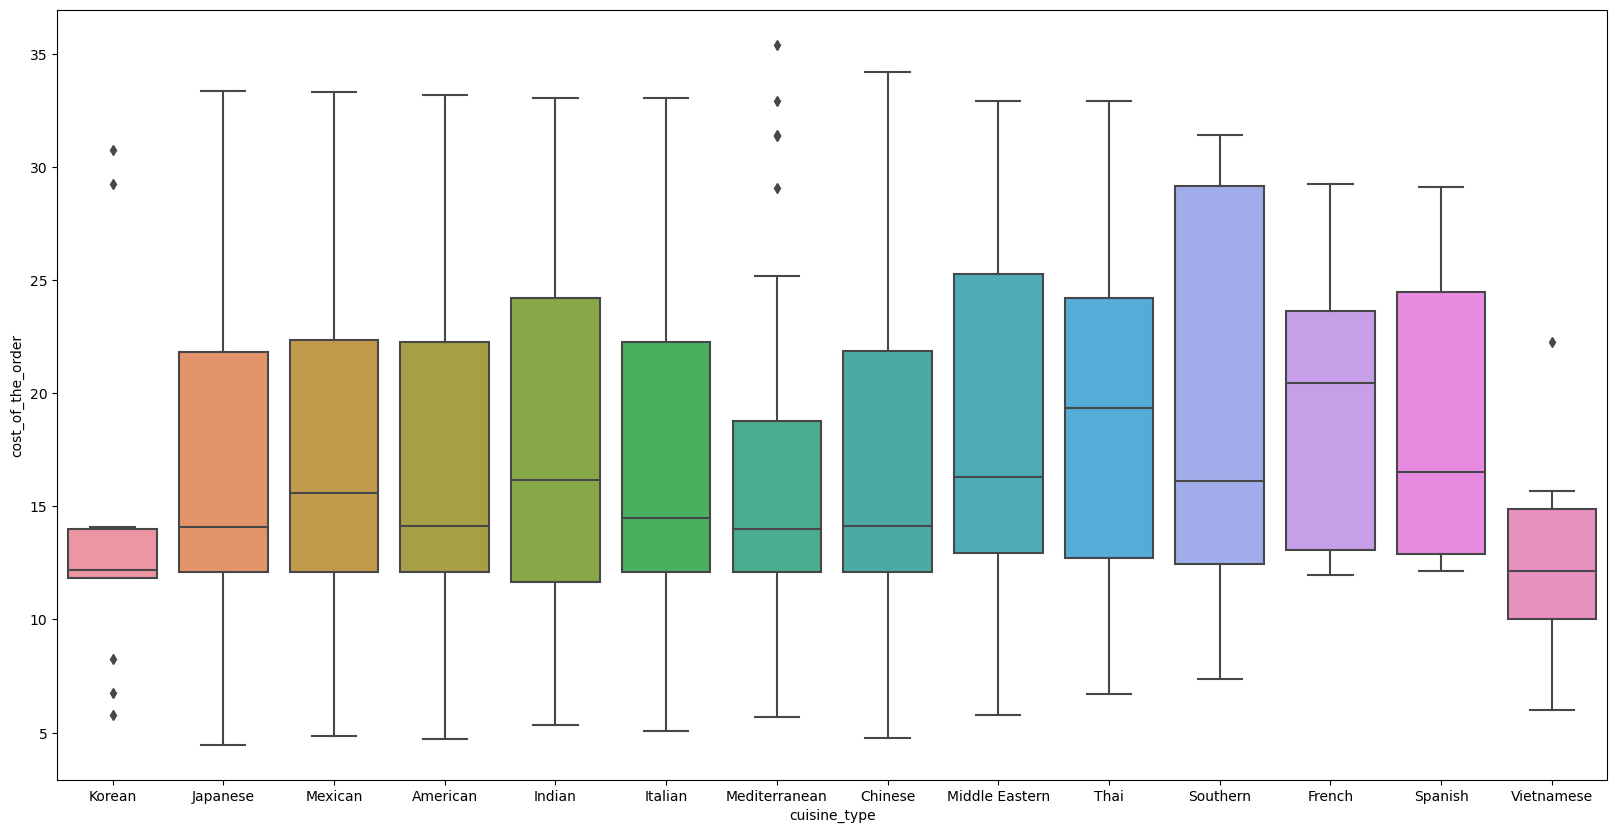

In [152]:
###Bivariate Analysis - Relationship between cuisine type and cost of the order
plt.figure(figsize=(20,10))
sns.boxplot(x='cuisine_type',y='cost_of_the_order',data = df)

#### Observations: The average cost of the order for most of the orders range between 12 to 20 dollars across the cuisine types. The minimum order value is 5 dollars offered by Japenese, Chinese and American cuisines. 


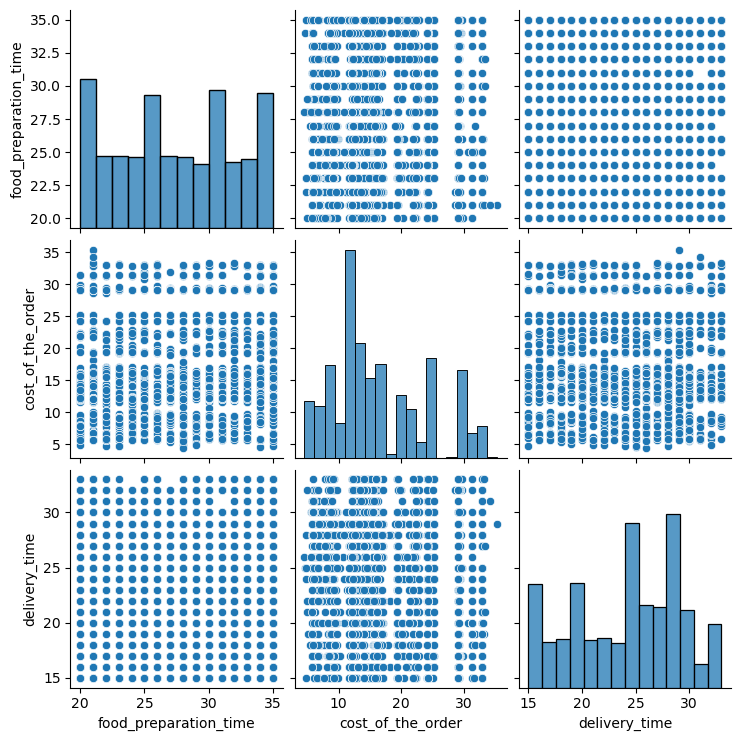

In [210]:
sns.pairplot(data = df[['food_preparation_time', 'cost_of_the_order', 'delivery_time']])

#### Observations: There isn't any strong correlation or relationship between the numerical values which is similar to the bivariant heat map used at the beginning of this question analysis.


<Axes: xlabel='cuisine_type', ylabel='count'>

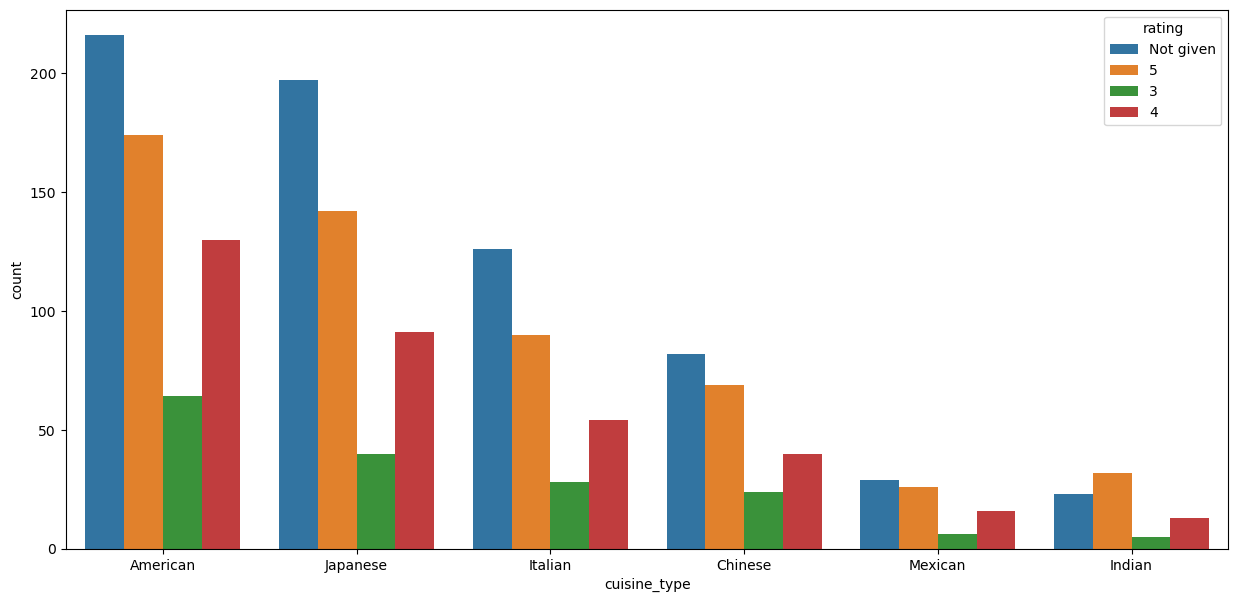

In [212]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating', order = df.cuisine_type.value_counts().iloc[:6].index)

#### Observations: The top 4 highly rated cuisine types that received the most orders are American, Japanese, Italian and Chinese.


<Axes: xlabel='cuisine_type', ylabel='count'>

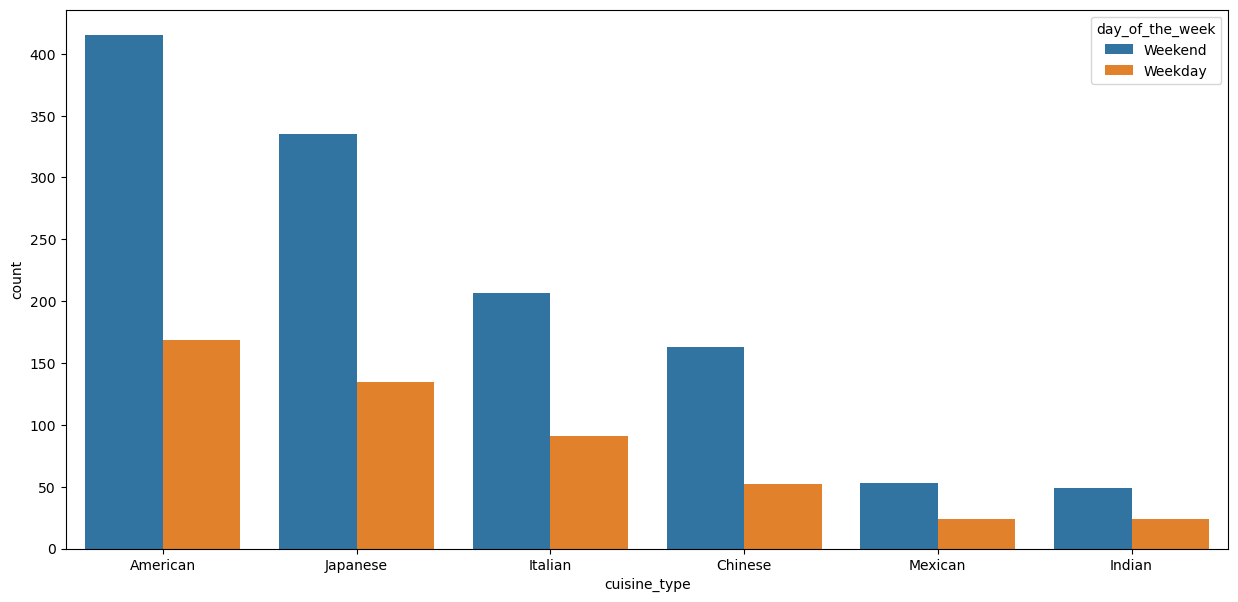

In [214]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week', order = df.cuisine_type.value_counts().iloc[:6].index)

#### Observations: The top 4  cuisine types that received the most orders are American, Japanese, Italian and Chinese and does not change when comparing weekday to weekend.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [184]:
##filtering the rated restaurants
rated = df[df['rating'] != 'Not given'].copy()

## converting object to integers
rated['rating'].astype('int32')

##Creating new dataframe which contains the restaurant names with thier rating count
rated_50 = rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending =False).reset_index()

##Restaurant names with rating count greater than 50
restaurant_50 = rated_50[rated_50['rating']>50]['restaurant_name']

##Filtering data to get restaurants that have rating greater than 50
res_comp = rated_50[rated_50['restaurant_name'].isin(restaurant_50)]

##Grouping restaurant names with their raings and find the mean rating of each restaurant
res_comp.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending =False).reset_index().dropna()

,restaurant_name,rating
0,Shake Shack,133.0
1,The Meatball Shop,84.0
2,Blue Ribbon Sushi,73.0
3,Blue Ribbon Fried Chicken,64.0


#### Observations: When analyzing the data set the Restaurants that would qualify for the promotional offer with a count more than 50 and the average rating greater than 4 are as follows:

1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [192]:
#Variable to hold the revenues 

income = 0
revenue = 0

#Create a Pandas series of the cost of the order column

cost = pd.Series(df['cost_of_the_order'])

##Creating Loop through series calculating the individual income componetnt and adding it to the revenue variable

for i in range(len(cost)):
    if(cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
         income = cost[i]*.25
    else:
        income = 0
    revenue = revenue + income

print('Net revenue generated is: ',round(revenue,2),'assuming no commission charged for orders with cost below $5')

Net revenue generated is:  6166.3 assuming no commission charged for orders with cost below $5


In [236]:
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

NameError: name 'restaurant_ratings' is not defined

#### Observations: Total net revenue for orders greater than 20 dollars is 6166.30 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [208]:
## Column for total time taken for delivery

df['Total_d_time']=df['food_preparation_time']+df['delivery_time'].copy()

## Calculating orders with the delivery time greater than 60

delivery_morethan_60min = df[df['Total_del_time']>60].shape[0]

print('Orders with delivery time more that 60 mins are:',delivery_morethan_60min)

## Calculating percentate of the orders that take more than 60 minutes

percentage = (delivery_morethan_60min/df['Total_d_time'].shape[0])*100

print('Percentage of orders that take more than 60 min to be delivered is:',format(percentage,'.2f'),'%')

Orders with delivery time more that 60 mins are: 200
Percentage of orders that take more than 60 min to be delivered is: 10.54 %


#### Observations: Ten percent of orders take more than 60 minutes to get deliverd from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [207]:
round(df.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index())

,day_of_the_week,delivery_time
0,Weekday,28.0
1,Weekend,22.0


#### Observations: 
1. The mean delivery time on weekdays is 28 minutes
2. The mean delivery time on weekends is 22 minutes
3. The mean delivery time is 6 minutes higher on week days than it is on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. The majority of FoodHub orders were placed on the weekend. 
2. More than double of the orders are placed on the weekend. During the weekday 547 orders were placed and 1351 orders are placed on the weekend.
3. American, Japanese and Italian are the most preferred cuisines ordered on FoodHub
4. Shakeshack has the highest number of orders.
5. Weekday deliver time is slower than weekend delivery time.
6. When looking the breakdown of customers only 65% of customers in the data set made one order.
7. The average food prep time for most cuisines range between 12 to 20 minutes across the cuisine types.

### Recommendations:
1. Out of 1898 orders 736 were not rated. This is close to 39% of orders placed which effects the validity of our analysis. Looking at giving a special promotion or incentive to customers for rating their orders would help in this department.
2. Send restaurants our findings so they can take into consideration improvements in food prep time and delivery time.
3. When analazying the ratings of orders the ratings decreased to 3 for longer delivery time. Improving delivery time and looking at what factors might be leading to some othe the longer delivery times like heavily populated areas and traffic would be a good next step.
4. Number of orders on the weekend are more than double than they are during the weekdays. Maybe a weekday promotion to get people ordering or discount that is only used during the week would help generate more orders.
5. Shakeshack has the highest number of orders so it might be adviseable to see if there are any special promotions that are being marketed and taking a deeper dive into how we can replicate this popularity with other restaurants that aren't as popular on FoodHub.
6. Look at more analysis to find out what impacts customer selections and restaurant ratings to help some of the struggling restaurants get more orders from FoodHub.

---